## Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## Loading DataSet

In [2]:
fake=pd.read_csv('Fake.csv')
true=pd.read_csv('True.csv')

## Data Loading|Reading

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true['label']=1

In [6]:
fake['label']=0

In [7]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


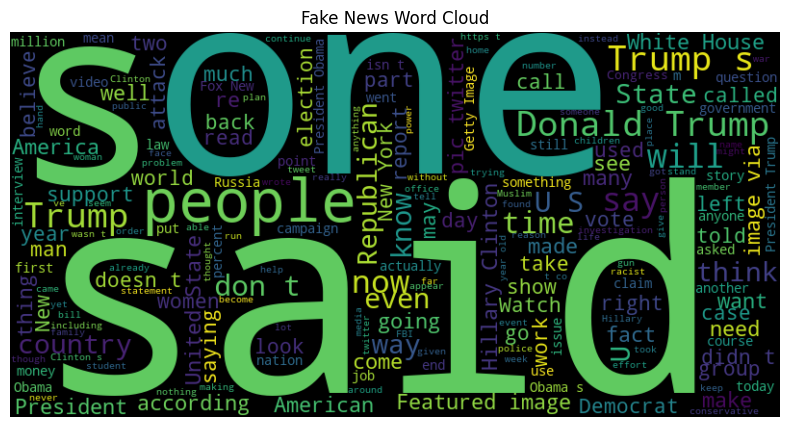

In [9]:
fake_text = ' '.join(fake['text'].astype(str).tolist())
# Fake News Word Cloud
fake_wc = WordCloud(width=800, height=400, background_color='black').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(fake_wc, interpolation='bilinear')
plt.title('Fake News Word Cloud')
plt.axis('off')
plt.show()



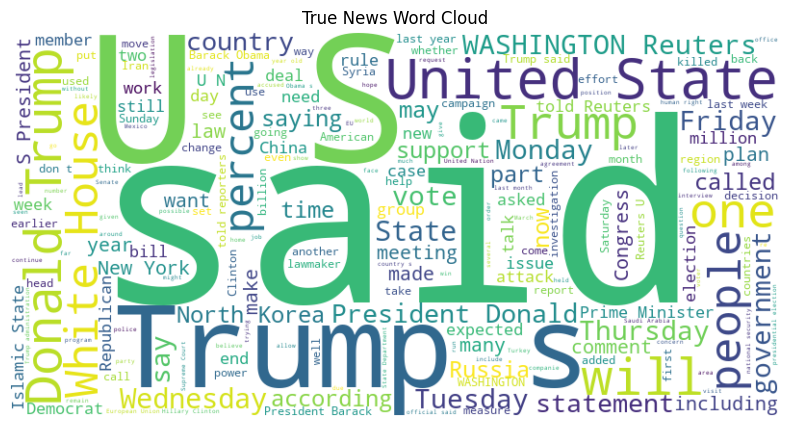

In [10]:
# True News Word Cloud
true_text = ' '.join(true['text'].astype(str).tolist())
true_wc = WordCloud(width=800, height=400, background_color='white').generate(true_text)
plt.figure(figsize=(10, 5))
plt.imshow(true_wc, interpolation='bilinear')
plt.title('True News Word Cloud')
plt.axis('off')
plt.show()


## Data Preprocessing

In [11]:
news=pd.concat([fake,true],axis=0)

In [12]:
news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
news.tail()

,title,text,subject,date,label
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [14]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [15]:
news=news.drop(['title','subject','date'],axis=1)

In [16]:
news.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [17]:
news=news.sample(frac=1)

In [18]:
news.head()

,text,label
14910,CARACAS (Reuters) - Venezuela s socialist gove...,1
7928,Attacking women s health is not a moderate p...,0
18166,"GOMA, Democratic Republic of Congo (Reuters) -...",1
1825,Eric Trump sat down with the Telegraph and thi...,0
3891,"Well, it happened, folks. Jon Stewart made yet...",0


In [19]:
news.reset_index(inplace=True)

In [20]:
news.head()

,index,text,label
0,14910,CARACAS (Reuters) - Venezuela s socialist gove...,1
1,7928,Attacking women s health is not a moderate p...,0
2,18166,"GOMA, Democratic Republic of Congo (Reuters) -...",1
3,1825,Eric Trump sat down with the Telegraph and thi...,0
4,3891,"Well, it happened, folks. Jon Stewart made yet...",0


In [21]:
news.head()

,index,text,label
0,14910,CARACAS (Reuters) - Venezuela s socialist gove...,1
1,7928,Attacking women s health is not a moderate p...,0
2,18166,"GOMA, Democratic Republic of Congo (Reuters) -...",1
3,1825,Eric Trump sat down with the Telegraph and thi...,0
4,3891,"Well, it happened, folks. Jon Stewart made yet...",0


C:\Users\Rafay Noor\AppData\Local\Temp\ipykernel_13092\3976611230.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=features_df, x='Importance', y='Feature', palette='viridis')


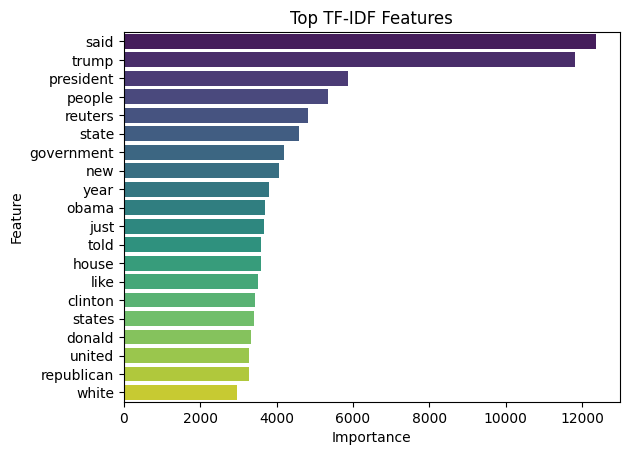

In [22]:
# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=20, stop_words='english')
X_tfidf = tfidf.fit_transform(news['text'])
feature_names = tfidf.get_feature_names_out()

# Bar chart of top features
feature_importance = X_tfidf.sum(axis=0).A1
features_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

sns.barplot(data=features_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top TF-IDF Features')
plt.show()



C:\Users\Rafay Noor\AppData\Local\Temp\ipykernel_13092\695069407.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=news, palette='coolwarm')


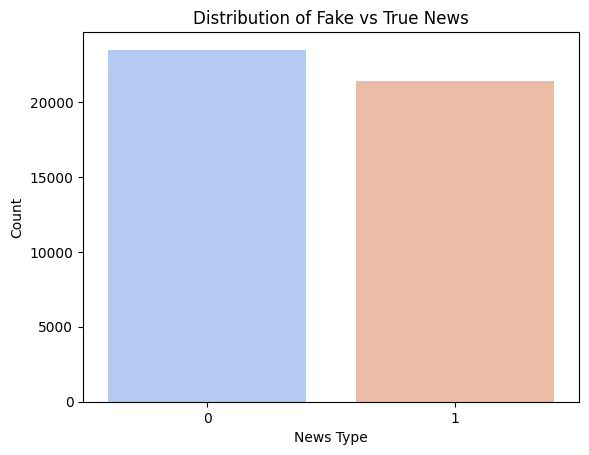

In [23]:
sns.countplot(x='label', data=news, palette='coolwarm')
plt.title('Distribution of Fake vs True News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()


## Feature Extraction

In [24]:
def wordopt(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetical characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text


In [25]:
news['text'] = news['text'].apply(wordopt)


In [26]:
news['text']

0        caracas reuters venezuela s socialist governme...
1        attacking women s health is not a moderate pos...
2        goma democratic republic of congo reuters mili...
3        eric trump sat down with the telegraph and thi...
4        well it happened folks jon stewart made yet an...
                               ...                        
44893    kuala lumpur reuters the half brother of north...
44894    tune in to the alternate current radio network...
44895    washington reuters roger stone a longtime ally...
44896    the new democrat party godless socialists raci...
44897    manila reuters two weeks ahead of a regional s...
Name: text, Length: 44898, dtype: object

In [27]:
#dependent and dependent features
x=news['text']
y= news['label']

In [28]:
x

0        caracas reuters venezuela s socialist governme...
1        attacking women s health is not a moderate pos...
2        goma democratic republic of congo reuters mili...
3        eric trump sat down with the telegraph and thi...
4        well it happened folks jon stewart made yet an...
                               ...                        
44893    kuala lumpur reuters the half brother of north...
44894    tune in to the alternate current radio network...
44895    washington reuters roger stone a longtime ally...
44896    the new democrat party godless socialists raci...
44897    manila reuters two weeks ahead of a regional s...
Name: text, Length: 44898, dtype: object

In [29]:
y

0        1
1        0
2        1
3        0
4        0
        ..
44893    1
44894    0
44895    1
44896    0
44897    1
Name: label, Length: 44898, dtype: int64

# Training Model Using Support Vector Classifier

### Train-Test Splitting

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [31]:
x_test.shape


(13470,)

In [32]:
x_train.shape

(31428,)

In [33]:
y_test.shape

(13470,)

#### converting into vector

In [34]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


In [35]:
xv_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6454482 stored elements and shape (31428, 97169)>

In [36]:
xv_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2751731 stored elements and shape (13470, 97169)>

In [37]:
xv_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6454482 stored elements and shape (31428, 97169)>

### ML Model

### Logistic regression

In [38]:
LR= LogisticRegression()

In [39]:
LR.fit(xv_train,y_train)

LogisticRegression()

In [40]:
pred_lr= LR.predict(xv_test)

In [41]:
print(x_train.shape)  # Training data shape
print(xv_test.shape)  # Test data shape


(31428,)
(13470, 97169)


In [42]:
LR.score(xv_test,y_test)

0.9864884929472902

In [43]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7008
           1       0.98      0.99      0.99      6462

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [44]:
DTC=DecisionTreeClassifier()

In [45]:
DTC.fit(xv_train,y_train)

DecisionTreeClassifier()

In [46]:
pred_dtc=DTC.predict(xv_test)

In [47]:
DTC.score(xv_test,y_test)

0.99547141796585

In [48]:
print(classification_report(y_test,pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7008
           1       1.00      1.00      1.00      6462

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [49]:
RFC=RandomForestClassifier()

In [50]:
RFC.fit(xv_train,y_train)

RandomForestClassifier()

In [51]:
pred_rfc=RFC.predict(xv_test)

In [52]:
rfc_score=RFC.score(xv_test,y_test)

In [53]:

print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7008
           1       0.99      0.99      0.99      6462

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



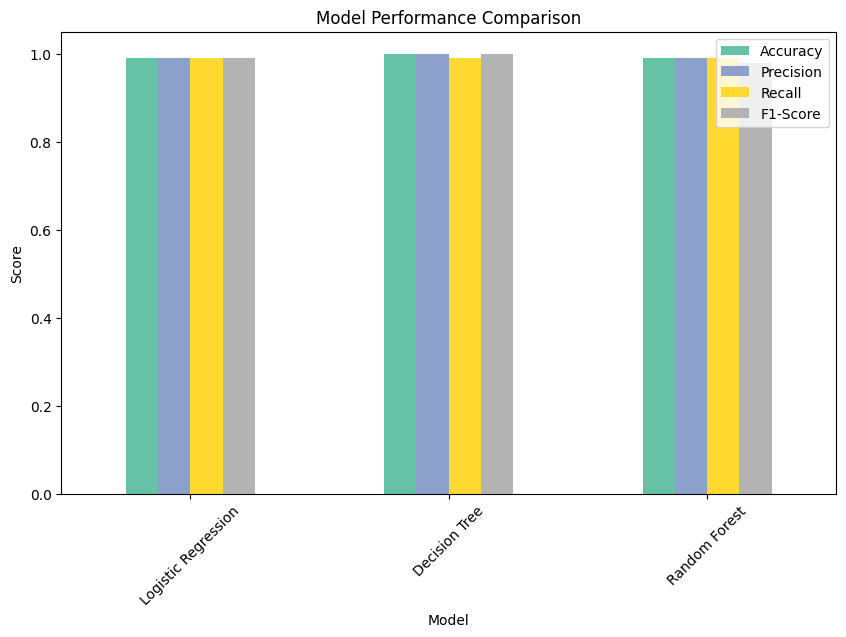

In [54]:
metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.99, 1.00, 0.99],  
    'Precision': [0.99, 1.00, 0.99],
    'Recall': [0.99, 0.99, 0.99],
    'F1-Score': [0.99, 1.00, 0.98]
})

metrics.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


In [55]:
def output_label(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return 'Genuine news'

In [60]:

def manual_testing (news):
    testing_news={"text": [news]} 
    new_def_test=pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr=LR.predict(new_xv_test)
    pred_dtc = DTC.predict(new_xv_test)
    pred_rfc=RFC.predict(new_xv_test)
    return "\n\nLR Prediction: {}  \nRFC Prediction: {}".format(
    output_label(pred_lr[0]), output_label (pred_rfc[0]))

In [62]:
news_article=str(input())

In [58]:
manual_testing(news_article)

'\n\nLR Prediction: Fake News  \nRFC Prediction: Fake News'